#### Mochamad Aulia Akbar Praditomo
#### 1606827145
#### DSA-B

# Tugas 4

## Image Classification

Pengelompokkan gambar sesuai yang diminta di soal sehingga terdapat 6 bagian:
-	Original data dari 3 kelas (Atypical Nevus, Common Nevus dan Melanoma)
-	Inpainted data dari 3 kelas
-	Original dan Inpainted data dari 3 kelas
-	Original data dari 2 kelas (NonMelanoma(Atypical Nevus, Common Nevus) dan Melanoma)
-	Inpainted data dari 2 kelas
-	Original dan Inpainted data dari 2 kelas

Masing masing bagian berisi 3 jenis data yaitu data train, val, dan test yang terbagi menjadi 80%, 10%, 10%.
Pengelompokkan ini dibantu dengan CSV yang dibuat teman saya bernama PH2_data_dump.csv untuk memudahkan proses pemisahan data.


In [1]:
import os, cv2, random
import matplotlib.pyplot as plt
from matplotlib import ticker
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display
import numpy as np
import pandas as pd
import shutil

Using TensorFlow backend.


Read CSV

In [2]:
#import image grouped
image_dump = pd.read_csv('PH2_data_dump.csv')
image_dump = image_dump.fillna('')
image_dump.describe()

,Common Nevus,Atypical Nevus,Melanoma
count,80,80,80
unique,80,80,41
top,IMD379,IMD360,
freq,1,1,40


Original Data 1

In [3]:
#copy original data
comm_nevus = image_dump['Common Nevus'].values
atypical_nevus = image_dump['Atypical Nevus'].values
melanoma = image_dump['Melanoma'].values

d_t_comm_nevus = []
d_t_comm_nevus_target = []
d_t_atypical_nevus = []
d_t_atypical_nevus_target = []
d_t_melanoma = []
d_t_melanoma_target = []

for index in range(0, 64):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/train/Common_Nevus/' + comm_nevus[index] + '.ppm'
    d_t_comm_nevus.append(file_path)
    d_t_comm_nevus_target.append(target_path)
    
for index in range(0, 64):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/train/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    d_t_atypical_nevus.append(file_path)
    d_t_atypical_nevus_target.append(target_path)

for index in range(0, 32):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/train/Melanoma/' + melanoma[index] + '.ppm'
    d_t_melanoma.append(file_path)
    d_t_melanoma_target.append(target_path)
    
val_comm_nevus = []
val_comm_nevus_target = []
val_atypical_nevus = []
val_atypical_nevus_target = []
val_melanoma = []
val_melanoma_target = []

for index in range(64, 72):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/val/Common_Nevus/' + comm_nevus[index] + '.ppm'
    val_comm_nevus.append(file_path)
    val_comm_nevus_target.append(target_path)
    
for index in range(64, 72):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/val/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    val_atypical_nevus.append(file_path)
    val_atypical_nevus_target.append(target_path)
    
for index in range(32, 36):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/val/Melanoma/' + melanoma[index] + '.ppm'
    val_melanoma.append(file_path)
    val_melanoma_target.append(target_path)
    
test_comm_nevus = []
test_comm_nevus_target = []
test_atypical_nevus = []
test_atypical_nevus_target = []
test_melanoma = []
test_melanoma_target = []

for index in range(72, 80):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/test/Common_Nevus/' + comm_nevus[index] + '.ppm'
    test_comm_nevus.append(file_path)
    test_comm_nevus_target.append(target_path)
    
for index in range(72, 80):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/test/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    test_atypical_nevus.append(file_path)
    test_atypical_nevus_target.append(target_path)
    
for index in range(36, 40):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/original.ppm'
    target_path = './Dermoscopy/Original_data_1/test/Melanoma/' + melanoma[index] + '.ppm'
    test_melanoma.append(file_path)
    test_melanoma_target.append(target_path)

In [4]:
#copy original data execution
for src, target in zip(d_t_comm_nevus, d_t_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(d_t_atypical_nevus, d_t_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(d_t_melanoma, d_t_melanoma_target):
    shutil.copy(src, target)
for src, target in zip(val_comm_nevus, val_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(val_atypical_nevus, val_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(val_melanoma, val_melanoma_target):
    shutil.copy(src, target)
for src, target in zip(test_comm_nevus, test_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(test_atypical_nevus, test_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(test_melanoma, test_melanoma_target):
    shutil.copy(src, target)

Inpainted Data 1

In [5]:
#copy inpainted data
i_d_t_comm_nevus = []
i_d_t_comm_nevus_target = []
i_d_t_atypical_nevus = []
i_d_t_atypical_nevus_target = []
i_d_t_melanoma = []
i_d_t_melanoma_target = []

for index in range(0, 64):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/train/Common_Nevus/' + comm_nevus[index] + '.ppm'
    i_d_t_comm_nevus.append(file_path)
    i_d_t_comm_nevus_target.append(target_path)
    
for index in range(0, 64):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/train/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    i_d_t_atypical_nevus.append(file_path)
    i_d_t_atypical_nevus_target.append(target_path)

for index in range(0, 32):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/train/Melanoma/' + melanoma[index] + '.ppm'
    i_d_t_melanoma.append(file_path)
    i_d_t_melanoma_target.append(target_path)
    
i_val_comm_nevus = []
i_val_comm_nevus_target = []
i_val_atypical_nevus = []
i_val_atypical_nevus_target = []
i_val_melanoma = []
i_val_melanoma_target = []

for index in range(64, 72):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/val/Common_Nevus/' + comm_nevus[index] + '.ppm'
    i_val_comm_nevus.append(file_path)
    i_val_comm_nevus_target.append(target_path)
    
for index in range(64, 72):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/val/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    i_val_atypical_nevus.append(file_path)
    i_val_atypical_nevus_target.append(target_path)
    
for index in range(32, 36):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/val/Melanoma/' + melanoma[index] + '.ppm'
    i_val_melanoma.append(file_path)
    i_val_melanoma_target.append(target_path)
    
i_test_comm_nevus = []
i_test_comm_nevus_target = []
i_test_atypical_nevus = []
i_test_atypical_nevus_target = []
i_test_melanoma = []
i_test_melanoma_target = []

for index in range(72, 80):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + comm_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/test/Common_Nevus/' + comm_nevus[index] + '.ppm'
    i_test_comm_nevus.append(file_path)
    i_test_comm_nevus_target.append(target_path)
    
for index in range(72, 80):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + atypical_nevus[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/test/Atypical_Nevus/' + atypical_nevus[index] + '.ppm'
    i_test_atypical_nevus.append(file_path)
    i_test_atypical_nevus_target.append(target_path)
    
for index in range(36, 40):
    file_path = './PH2_dermoscopy/ppmPH2HairRemove/' + melanoma[index] + '.ppm/inpainted.ppm'
    target_path = './Dermoscopy/Inpainted_data_1/test/Melanoma/' + melanoma[index] + '.ppm'
    i_test_melanoma.append(file_path)
    i_test_melanoma_target.append(target_path)

In [6]:
#copy inpainted data execution
for src, target in zip(i_d_t_comm_nevus, i_d_t_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_d_t_atypical_nevus, i_d_t_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_d_t_melanoma, i_d_t_melanoma_target):
    shutil.copy(src, target)
for src, target in zip(i_val_comm_nevus, i_val_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_val_atypical_nevus, i_val_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_val_melanoma, i_val_melanoma_target):
    shutil.copy(src, target)
for src, target in zip(i_test_comm_nevus, i_test_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_test_atypical_nevus, i_test_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(i_test_melanoma, i_test_melanoma_target):
    shutil.copy(src, target)

Original + Inpainted data 1

In [7]:
#copy original and inpainted data
comb_comm_nevus = []
comb_comm_nevus_target = []
comb_atypical_nevus = []
comb_atypical_nevus_target = []
comb_melanoma = []
comb_melanoma_target = []
comb_comm_nevus_val = []
comb_comm_nevus_target_val = []
comb_atypical_nevus_val = []
comb_atypical_nevus_target_val = []
comb_melanoma_val = []
comb_melanoma_target_val = []
comb_comm_nevus_test = []
comb_comm_nevus_target_test = []
comb_atypical_nevus_test = []
comb_atypical_nevus_target_test = []
comb_melanoma_test = []
comb_melanoma_target_test = []

for original, inpainted in zip(d_t_comm_nevus, i_d_t_comm_nevus):
    file_name = original.split("/")[3]
    comb_comm_nevus.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Common_Nevus/original_' + file_name
    comb_comm_nevus_target.append(target_path)
    comb_comm_nevus.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Common_Nevus/inpainted_' + file_name
    comb_comm_nevus_target.append(target_path)
    
for original, inpainted in zip(d_t_atypical_nevus, i_d_t_atypical_nevus):
    file_name = original.split("/")[3]
    comb_atypical_nevus.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Atypical_Nevus/original_' + file_name
    comb_atypical_nevus_target.append(target_path)
    comb_atypical_nevus.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Atypical_Nevus/inpainted_' + file_name
    comb_atypical_nevus_target.append(target_path)
    
for original, inpainted in zip(d_t_melanoma, i_d_t_melanoma):
    file_name = original.split("/")[3]
    comb_melanoma.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_' + file_name
    comb_melanoma_target.append(target_path)
    comb_melanoma.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_' + file_name
    comb_melanoma_target.append(target_path)
    

for original, inpainted in zip(val_comm_nevus, i_val_comm_nevus):
    file_name = original.split("/")[3]
    comb_comm_nevus_val.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Common_Nevus/original_' + file_name
    comb_comm_nevus_target_val.append(target_path)
    comb_comm_nevus_val.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Common_Nevus/inpainted_' + file_name
    comb_comm_nevus_target_val.append(target_path)
    
for original, inpainted in zip(val_atypical_nevus, i_val_atypical_nevus):
    file_name = original.split("/")[3]
    comb_atypical_nevus_val.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Atypical_Nevus/original_' + file_name
    comb_atypical_nevus_target_val.append(target_path)
    comb_atypical_nevus_val.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Atypical_Nevus/inpainted_' + file_name
    comb_atypical_nevus_target_val.append(target_path)
    
for original, inpainted in zip(val_melanoma, i_val_melanoma):
    file_name = original.split("/")[3]
    comb_melanoma_val.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Melanoma/original_' + file_name
    comb_melanoma_target_val.append(target_path)
    comb_melanoma_val.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/val/Melanoma/inpainted_' + file_name
    comb_melanoma_target_val.append(target_path)
    
    
for original, inpainted in zip(test_comm_nevus, i_test_comm_nevus):
    file_name = original.split("/")[3]
    comb_comm_nevus_test.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Common_Nevus/original_' + file_name
    comb_comm_nevus_target_test.append(target_path)
    comb_comm_nevus_test.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Common_Nevus/inpainted_' + file_name
    comb_comm_nevus_target_test.append(target_path)
    
for original, inpainted in zip(test_atypical_nevus, i_test_atypical_nevus):
    file_name = original.split("/")[3]
    comb_atypical_nevus_test.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Atypical_Nevus/original_' + file_name
    comb_atypical_nevus_target_test.append(target_path)
    comb_atypical_nevus_test.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Atypical_Nevus/inpainted_' + file_name
    comb_atypical_nevus_target_test.append(target_path)
    
for original, inpainted in zip(test_melanoma, i_test_melanoma):
    file_name = original.split("/")[3]
    comb_melanoma_test.append(original)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Melanoma/original_' + file_name
    comb_melanoma_target_test.append(target_path)
    comb_melanoma_test.append(inpainted)
    target_path = './Dermoscopy/Original_Inpainted_data_1/test/Melanoma/inpainted_' + file_name
    comb_melanoma_target_test.append(target_path)

In [8]:
#copy original and inpainted data execution
for src, target in zip(comb_comm_nevus, comb_comm_nevus_target):
    shutil.copy(src, target)
for src, target in zip(comb_atypical_nevus, comb_atypical_nevus_target):
    shutil.copy(src, target)
for src, target in zip(comb_melanoma, comb_melanoma_target):
    shutil.copy(src, target)
for src, target in zip(comb_comm_nevus_val, comb_comm_nevus_target_val):
    shutil.copy(src, target)
for src, target in zip(comb_atypical_nevus_val, comb_atypical_nevus_target_val):
    shutil.copy(src, target)
for src, target in zip(comb_melanoma_val, comb_melanoma_target_val):
    shutil.copy(src, target)
for src, target in zip(comb_comm_nevus_test, comb_comm_nevus_target_test):
    shutil.copy(src, target)
for src, target in zip(comb_atypical_nevus_test, comb_atypical_nevus_target_test):
    shutil.copy(src, target)
for src, target in zip(comb_melanoma_test, comb_melanoma_target_test):
    shutil.copy(src, target)

Original data 2

In [9]:
#copy original to 2nd folder
d_t_common_nevus = './Dermoscopy/Original_data_1/train/Common_Nevus'
dest = './Dermoscopy/Original_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_atypical_nevus = './Dermoscopy/Original_data_1/train/Atypical_Nevus'
dest = './Dermoscopy/Original_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_melanoma = './Dermoscopy/Original_data_1/train/Melanoma'
dest = './Dermoscopy/Original_data_2/train/Melanoma'
src_files = os.listdir(d_t_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(d_t_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
            
            
val_common_nevus = './Dermoscopy/Original_data_1/val/Common_Nevus'
dest = './Dermoscopy/Original_data_2/val/NonMelanoma'
src_files = os.listdir(val_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_atypical_nevus = './Dermoscopy/Original_data_1/val/Atypical_Nevus'
dest = './Dermoscopy/Original_data_2/val/NonMelanoma'
src_files = os.listdir(val_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_melanoma = './Dermoscopy/Original_data_1/val/Melanoma'
dest = './Dermoscopy/Original_data_2/val/Melanoma'
src_files = os.listdir(val_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(val_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

test_common_nevus = './Dermoscopy/Original_data_1/test/Common_Nevus'
dest = './Dermoscopy/Original_data_2/test/NonMelanoma'
src_files = os.listdir(test_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_atypical_nevus = './Dermoscopy/Original_data_1/test/Atypical_Nevus'
dest = './Dermoscopy/Original_data_2/test/NonMelanoma'
src_files = os.listdir(test_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_melanoma = './Dermoscopy/Original_data_1/test/Melanoma'
dest = './Dermoscopy/Original_data_2/test/Melanoma'
src_files = os.listdir(test_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(test_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

Inpainted data 2

In [10]:
#copy inpainted data to 2nd folder
d_t_common_nevus = './Dermoscopy/Inpainted_data_1/train/Common_Nevus'
dest = './Dermoscopy/Inpainted_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_atypical_nevus = './Dermoscopy/Inpainted_data_1/train/Atypical_Nevus'
dest = './Dermoscopy/Inpainted_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_melanoma = './Dermoscopy/Inpainted_data_1/train/Melanoma'
dest = './Dermoscopy/Inpainted_data_2/train/Melanoma'
src_files = os.listdir(d_t_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(d_t_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
            
val_common_nevus = './Dermoscopy/Inpainted_data_1/val/Common_Nevus'
dest = './Dermoscopy/Inpainted_data_2/val/NonMelanoma'
src_files = os.listdir(val_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_atypical_nevus = './Dermoscopy/Inpainted_data_1/val/Atypical_Nevus'
dest = './Dermoscopy/Inpainted_data_2/val/NonMelanoma'
src_files = os.listdir(val_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_melanoma = './Dermoscopy/Inpainted_data_1/val/Melanoma'
dest = './Dermoscopy/Inpainted_data_2/val/Melanoma'
src_files = os.listdir(val_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(val_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

test_common_nevus = './Dermoscopy/Inpainted_data_1/test/Common_Nevus'
dest = './Dermoscopy/Inpainted_data_2/test/NonMelanoma'
src_files = os.listdir(test_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_atypical_nevus = './Dermoscopy/Inpainted_data_1/test/Atypical_Nevus'
dest = './Dermoscopy/Inpainted_data_2/test/NonMelanoma'
src_files = os.listdir(test_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_melanoma = './Dermoscopy/Inpainted_data_1/test/Melanoma'
dest = './Dermoscopy/Inpainted_data_2/test/Melanoma'
src_files = os.listdir(test_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(test_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

Original + Inpainted data 2

In [11]:
#copy original and inpainted to 2nd folder
d_t_common_nevus = './Dermoscopy/Original_Inpainted_data_1/train/Common_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_atypical_nevus = './Dermoscopy/Original_Inpainted_data_1/train/Atypical_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/train/NonMelanoma'
src_files = os.listdir(d_t_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(d_t_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
d_t_melanoma = './Dermoscopy/Original_Inpainted_data_1/train/Melanoma'
dest = './Dermoscopy/Original_Inpainted_data_2/train/Melanoma'
src_files = os.listdir(d_t_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(d_t_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
            
val_common_nevus = './Dermoscopy/Original_Inpainted_data_1/val/Common_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/val/NonMelanoma'
src_files = os.listdir(val_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_atypical_nevus = './Dermoscopy/Original_Inpainted_data_1/val/Atypical_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/val/NonMelanoma'
src_files = os.listdir(val_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(val_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
val_melanoma = './Dermoscopy/Original_Inpainted_data_1/val/Melanoma'
dest = './Dermoscopy/Original_Inpainted_data_2/val/Melanoma'
src_files = os.listdir(val_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(val_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

test_common_nevus = './Dermoscopy/Original_Inpainted_data_1/test/Common_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/test/NonMelanoma'
src_files = os.listdir(test_common_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_common_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_atypical_nevus = './Dermoscopy/Original_Inpainted_data_1/test/Atypical_Nevus'
dest = './Dermoscopy/Original_Inpainted_data_2/test/NonMelanoma'
src_files = os.listdir(test_atypical_nevus)
for file_name in src_files:
    full_file_name = os.path.join(test_atypical_nevus, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)
test_melanoma = './Dermoscopy/Original_Inpainted_data_1/test/Melanoma'
dest = './Dermoscopy/Original_Inpainted_data_2/test/Melanoma'
src_files = os.listdir(test_melanoma)
for file_name in src_files:
    full_file_name = os.path.join(test_melanoma, file_name)
    if (os.path.isfile(full_file_name)):
        if(".DS_Store" not in full_file_name):
            shutil.copy(full_file_name, dest)

In [12]:
#create base model
base_model  = InceptionV3(weights = 'imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


Dibuat datagen train dan test

In [13]:
data_gen_args = dict(preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

In [14]:
train_generator = train_datagen.flow_from_directory('./Dermoscopy/Original_Inpainted_data_1/train',
                                                    target_size=(128,128),batch_size=32)

valid_generator = test_datagen.flow_from_directory('./Dermoscopy/Original_Inpainted_data_1/val',
                                                   target_size=(128,128),batch_size=32)

Found 320 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [15]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.layers.core import Activation, Flatten, Dense

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
        
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
 
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
 
        # return the constructed network architecture
        return model 

model = LeNet.build(width=128, height=128, depth=3, classes=3)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('saved_model/benchmark.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

Dilakukan model fitting dari generator train

In [17]:
history = model.fit_generator(train_generator, steps_per_epoch = 13,
                              validation_data=valid_generator,validation_steps=3, epochs=10,verbose=1,callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
13/13 [==============================] - 25s 2s/step - loss: 8.9545 - acc: 0.3798 - val_loss: 9.8499 - val_acc: 0.3889

Epoch 00001: val_loss improved from inf to 9.84995, saving model to saved_model/benchmark.hdf5
Epoch 2/10
13/13 [==============================] - 20s 2s/step - loss: 9.6864 - acc: 0.3990 - val_loss: 9.4022 - val_acc: 0.4167

Epoch 00002: val_loss improved from 9.84995 to 9.40222, saving model to saved_model/benchmark.hdf5
Epoch 3/10
13/13 [==============================] - 21s 2s/step - loss: 9.5701 - acc: 0.4062 - val_loss: 9.6261 - val_acc: 0.4028

Epoch 00003: val_loss did not improve from 9.40222
Epoch 4/10
13/13 [==============================] - 20s 2s/step - loss: 9.7638 - acc: 0.3942 - val_loss: 9.7380 - val_acc: 0.3958

Epoch 00004: val_loss did not improve from 9.40222
Epoch 5/10
13/13 [==============================] - 21s 2s/step - loss: 9.6864 - acc: 0.3990 - val_loss: 9.8499 - val_acc: 0.3889

E

In [18]:
# Define the output layers for Inceptionv3
last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(3,activation='softmax')(x)

model = Model(input=base_model.input,output=preds)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0] 

concatenate_2 (Concatenate)     (None, None, None, 7 0           activation_92[0][0]              
                                                                 activation_93[0][0]              
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 1 0           batch_normalization_94[0][0]     
__________________________________________________________________________________________________
mixed10 (Concatenate)           (None, None, None, 2 0           activation_86[0][0]              
                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
__________________________________________________________________________________________________
global_ave

C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [19]:
#Load the weights for the common layers from the benchmark model
base_model.load_weights(filepath='saved_model/benchmark.hdf5',by_name=True)

In [20]:
#Freeze the original layers of Inception3
for layer in base_model.layers:
    layer.trainable = False

In [21]:
#Compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('saved_model/transfer_learning.hdf5', verbose=1,save_best_only=True)
# Stop the traning if the model shows no improvement
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=1,verbose=1,mode='auto')

In [23]:
# Train the model
history_transfer = model.fit_generator(train_generator, steps_per_epoch = 13,validation_data=valid_generator,
                                       validation_steps=4, epochs=5,verbose=1,callbacks=[checkpointer])

Epoch 1/5
13/13 [==============================] - 22s 2s/step - loss: 1.3711 - acc: 0.4399 - val_loss: 2.7153 - val_acc: 0.4250

Epoch 00001: val_loss improved from inf to 2.71531, saving model to saved_model/transfer_learning.hdf5
Epoch 2/5
13/13 [==============================] - 15s 1s/step - loss: 1.2223 - acc: 0.4615 - val_loss: 2.5658 - val_acc: 0.4625

Epoch 00002: val_loss improved from 2.71531 to 2.56583, saving model to saved_model/transfer_learning.hdf5
Epoch 3/5
13/13 [==============================] - 15s 1s/step - loss: 1.2471 - acc: 0.4591 - val_loss: 2.3987 - val_acc: 0.5000

Epoch 00003: val_loss improved from 2.56583 to 2.39865, saving model to saved_model/transfer_learning.hdf5
Epoch 4/5
13/13 [==============================] - 15s 1s/step - loss: 1.0273 - acc: 0.4760 - val_loss: 4.2844 - val_acc: 0.4125

Epoch 00004: val_loss did not improve from 2.39865
Epoch 5/5
13/13 [==============================] - 16s 1s/step - loss: 1.0027 - acc: 0.4880 - val_loss: 3.2465 -

Transfer learning bisa dilihat akurasi dan lossnya

In [24]:
display(history_transfer.history)

{'val_loss': [2.715311861038208,
  2.5658275544643403,
  2.3986510396003724,
  4.284364461898804,
  3.246526527404785],
 'val_acc': [0.425, 0.4625, 0.5, 0.4125, 0.4125],
 'loss': [1.371142877982213,
  1.2223175901633043,
  1.2471320170622606,
  1.0273079092685993,
  1.0027010761774504],
 'acc': [0.43990384615384615,
  0.46153846153846156,
  0.45913461538461536,
  0.47596153846153844,
  0.4879807692307692]}

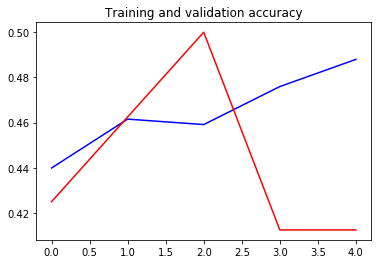

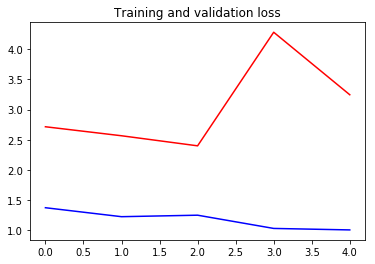

In [25]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Training and validation accuracy")
    plt.show()
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Training and validation loss")
    
    plt.show()

plot_training(history_transfer)

Akurasi terbaik yaitu 0.5125

In [26]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [27]:
# Unfreeze the last three inception modules
for layer in model.layers[:229]:
    layer.trainable = False
for layer in model.layers[229:]:
    layer.trainable = True

Optimisasi dengan SGD

In [28]:
from keras.optimizers import SGD

# Use an optimizer with slow learning rate
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Save the model with best validation loss
checkpointer = ModelCheckpoint('saved_model/fine_tuning.hdf5', verbose=1,save_best_only=True,monitor='val_loss')

# Stop the traning if the validation loss doesn't improve
stopper = EarlyStopping(monitor='val_loss,val_acc',min_delta=0.1,patience=2,verbose=1,mode='auto')

# Train the model
history = model.fit_generator(train_generator, steps_per_epoch = 13,validation_data=valid_generator,
                              validation_steps=3, epochs=5,verbose=1,callbacks=[checkpointer])

Epoch 1/5
13/13 [==============================] - 31s 2s/step - loss: 0.8990 - acc: 0.5601 - val_loss: 2.1084 - val_acc: 0.3889

Epoch 00001: val_loss improved from inf to 2.10843, saving model to saved_model/fine_tuning.hdf5
Epoch 2/5
13/13 [==============================] - 19s 1s/step - loss: 0.9230 - acc: 0.5240 - val_loss: 2.1206 - val_acc: 0.4167

Epoch 00002: val_loss did not improve from 2.10843
Epoch 3/5
13/13 [==============================] - 20s 2s/step - loss: 0.9059 - acc: 0.5962 - val_loss: 2.1609 - val_acc: 0.3611

Epoch 00003: val_loss did not improve from 2.10843
Epoch 4/5
13/13 [==============================] - 19s 1s/step - loss: 0.9177 - acc: 0.5625 - val_loss: 2.0947 - val_acc: 0.4375

Epoch 00004: val_loss improved from 2.10843 to 2.09466, saving model to saved_model/fine_tuning.hdf5
Epoch 5/5
13/13 [==============================] - 20s 2s/step - loss: 0.9527 - acc: 0.5312 - val_loss: 1.8368 - val_acc: 0.4167

Epoch 00005: val_loss improved from 2.09466 to 1.8

In [29]:
model.load_weights('saved_model/fine_tuning.hdf5')

Model yang sudah dioptimisasi inilah dapat dibuat fungsi untuk memprediksi gambar

In [30]:
from keras.preprocessing.image import img_to_array,load_img
import cv2

def pred(img_path):    
    img = load_img(img_path,target_size = (128,128)) #Load the image and set the target size to the size of input of our model
    x = img_to_array(img) #Convert the image to array
    x = np.expand_dims(x,axis=0) #Convert the array to the form (1,x,y,z) 
    x = preprocess_input(x) # Use the preprocess input function o subtract the mean of all the images
    p = np.argmax(model.predict(x)) # Store the argmax of the predictions
    if p==0:     
        print("Atypical Nevus")
    elif p==1:
        print("Common Nevus")
    elif p==2:
        print("Melanoma")

In [31]:
for path in comb_melanoma_target:
    print(path)
    print(pred(path))

./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD058.ppm
Melanoma
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_IMD058.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD061.ppm
Melanoma
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_IMD061.ppm
Melanoma
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD063.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_IMD063.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD064.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_IMD064.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD065.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/inpainted_IMD065.ppm
Atypical Nevus
None
./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD080.ppm

Common Nevus


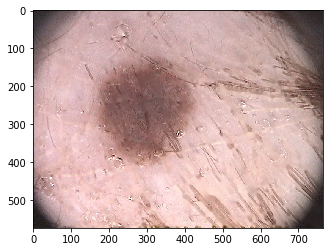

In [32]:
pred('./Dermoscopy/Original_Inpainted_data_1/train/Common_Nevus/inpainted_IMD003.ppm')
z = plt.imread('./Dermoscopy/Original_Inpainted_data_1/train/Common_Nevus/inpainted_IMD003.ppm') 
plt.imshow(z);

Common Nevus


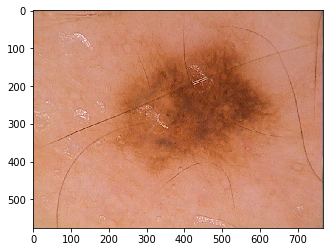

In [33]:
pred('./Dermoscopy/Original_Inpainted_data_1/train/Atypical_Nevus/original_IMD026.ppm')
z = plt.imread('./Dermoscopy/Original_Inpainted_data_1/train/Atypical_Nevus/original_IMD026.ppm') 
plt.imshow(z);

Melanoma


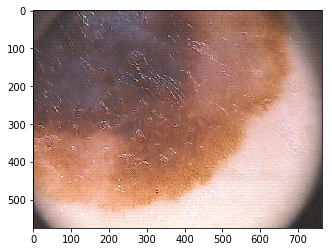

In [34]:
pred('./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD099.ppm')
z = plt.imread('./Dermoscopy/Original_Inpainted_data_1/train/Melanoma/original_IMD099.ppm') 
plt.imshow(z);

Dalam pengerjaan soal ini banyak dilakukan pertukaran pikiran dengan teman kelas lain